<a href="https://colab.research.google.com/github/prasngit5/hypothesis_Assign_G4/blob/main/Hyp3_Vaccinations_vs_Fatalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
response = requests.get("https://en.wikipedia.org/wiki/List_of_counties_in_Texas")
#cl= ['Smith County','Orange County','Nueces County','Young County','Shelby County','Irion County','Navarro County','Galveston County','Harris County','Parker County']
#ncl = ['Smith','Orange','Nueces','Young','Shelby','Irion','Navarro','Galveston','Harris','Parker']
d = pd.read_html(response.text)
d = d[1]
d.columns=['County Name','fips','cs','est','o','e','Population','a','m']
d = d[['County Name','Population']]
pop = d.set_index('County Name')
#ud = df.loc[Urban_counties]
#ud['County Name'] = uc1
##ud['County'] = uc1
##ud = ud.set_index('County')
##ud
#c_pop = d.loc[cl]
#c_pop['Population'][0]
#c_pop = ud
#c_pop
pop

,Population
County Name,
Anderson County,57922
Andrews County,18610
Angelina County,86395
Aransas County,23830
Archer County,8560
...,...
Wood County,44843
Yoakum County,7694
Young County,17867


In [3]:
vl = "https://dshs.texas.gov/immunize/covid19/COVID-19-Vaccine-Data-by-County.xls"
fl = "https://www.dshs.texas.gov/coronavirus/TexasCOVID19CaseCountData.xlsx"


In [4]:
dA = pd.read_excel(vl, sheet_name = 'By County')
dA=dA.truncate(before =3,after= 256)  # There are extra rows in the file, just remove, should look for last county, but this is easier
#dA.drop(labels=None, axis=0, index=None, columns=['Race/Ethnicity'], inplace=True)
dA.keys()


Index(['County Name', 'Public Health Region (PHR)', 'Total Doses Allocated',
       'Vaccine Doses Administered',
       'People Vaccinated with at least One Dose', 'People Fully Vaccinated',
       'Population\n12+', 'Population, 16+', 'Population, 65+',
       'Population, Phase 1A Healthcare Workers',
       'Population, Phase 1A Long-term Care Residents',
       'Population, 16-64\n Any Medical Condition',
       'Population, Education and Child Care Personnel',
       'People Vaccinated with an Additional Dose'],
      dtype='object')

In [5]:
dA = dA.set_index('County Name')


In [6]:
dA.drop(labels=None, axis=0, index=None, columns=['Public Health Region (PHR)', 'Total Doses Allocated',
       'Vaccine Doses Administered',
       'People Vaccinated with at least One Dose',
       'Population\n12+', 'Population, 16+', 'Population, 65+',
       'Population, Phase 1A Healthcare Workers',
       'Population, Phase 1A Long-term Care Residents',
       'Population, 16-64\n Any Medical Condition',
       'Population, Education and Child Care Personnel',
       'People Vaccinated with an Additional Dose'], inplace=True)

dA

,People Fully Vaccinated
County Name,
Anderson,20579
Andrews,7094
Angelina,34074
Aransas,12791
Archer,3654
...,...
Wood,17413
Yoakum,3048
Young,6497


In [7]:
#url1 = "https://www.dshs.texas.gov/coronavirus/TexasCOVID19CaseCountData.xlsx"
dF = pd.read_excel(fl, sheet_name = 'Case and Fatalities',skiprows=1)
dF = dF.truncate(before=0,after=253)  # There are extra rows in the file, just remove, should look for last county, but this is easier
dF = dF.rename(columns={'County': 'County Name'})
dF

,County Name,Confirmed Cases,Probable Cases,Fatalities
0,Anderson,5005.0,2841.0,184
1,Andrews,2688.0,0.0,52
2,Angelina,6627.0,6805.0,371
3,Aransas,1955.0,580.0,59
4,Archer,968.0,143.0,15
...,...,...,...,...
249,Wood,3415.0,2842.0,198
250,Yoakum,1157.0,0.0,30
251,Young,2378.0,323.0,60
252,Zapata,1668.0,505.0,43


In [8]:

#F = dF["County Name"]
#print(F)
pop["County Name"] =  dF["County Name"].values.tolist()
pop.reset_index(drop=True, inplace=True)
pop.set_index('County Name')
#pop.keys()
pop


,Population,County Name
0,57922,Anderson
1,18610,Andrews
2,86395,Angelina
3,23830,Aransas
4,8560,Archer
...,...,...
249,44843,Wood
250,7694,Yoakum
251,17867,Young
252,13889,Zapata


In [9]:
columns_titles = ["County Name","Population"]
pop=pop.reindex(columns=columns_titles)
pop.index.drop
#pop.set_index('County Name')
pop

,County Name,Population
0,Anderson,57922
1,Andrews,18610
2,Angelina,86395
3,Aransas,23830
4,Archer,8560
...,...,...
249,Wood,44843
250,Yoakum,7694
251,Young,17867
252,Zapata,13889


In [10]:
dF.drop(labels=None, axis=0, index=None, columns=['Probable Cases'], inplace=True)
#dF = dF.rename(columns={'County': 'County Name'})
dF = dF.set_index('County Name')
dF

,Confirmed Cases,Fatalities
County Name,,
Anderson,5005.0,184
Andrews,2688.0,52
Angelina,6627.0,371
Aransas,1955.0,59
Archer,968.0,15
...,...,...
Wood,3415.0,198
Yoakum,1157.0,30
Young,2378.0,60


In [30]:
Fatalities = dA["People Fully Vaccinated"].astype(np.float32)
new_df = dF.join(Fatalities)
new_df

,Confirmed Cases,Fatalities,People Fully Vaccinated
County Name,,,
Anderson,5005.0,184,20579.0
Andrews,2688.0,52,7094.0
Angelina,6627.0,371,34074.0
Aransas,1955.0,59,12791.0
Archer,968.0,15,3654.0
...,...,...,...
Wood,3415.0,198,17413.0
Yoakum,1157.0,30,3048.0
Young,2378.0,60,6497.0


In [28]:
dd = dA['People Fully Vaccinated'].astype(np.float32)
dd

County Name
Anderson    20579.0
Andrews      7094.0
Angelina    34074.0
Aransas     12791.0
Archer       3654.0
             ...   
Wood        17413.0
Yoakum       3048.0
Young        6497.0
Zapata       7722.0
Zavala       5343.0
Name: People Fully Vaccinated, Length: 254, dtype: float32

In [21]:
new_df.keys()

Index(['Confirmed Cases', 'Fatalities', 'People Fully Vaccinated'], dtype='object')

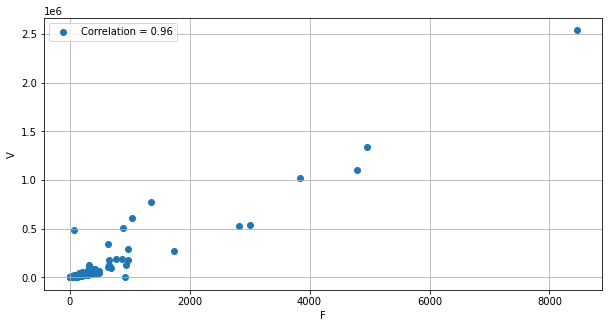

In [29]:
#plot 1:
fig = plt.figure(figsize=(10,5))
#plt.subplot(1, 2, 1)

#plt.scatter(female, male)
plt.scatter(new_df["Fatalities"], dd, label=f'Correlation = {np.round(np.corrcoef(new_df["Fatalities"], dd)[0,1], 2)}')
#plt.scatter(rdf["Confirmed Cases"], rdf["Fatalities"], label=f'rdf["Fatalities"] Correlation = {np.round(np.corrcoef(rdf["Confirmed Cases"], rdf["Fatalities"])[0,1], 2)}')

plt.xlabel("F")
plt.ylabel("V")
plt.legend()
plt.grid()
plt.show()

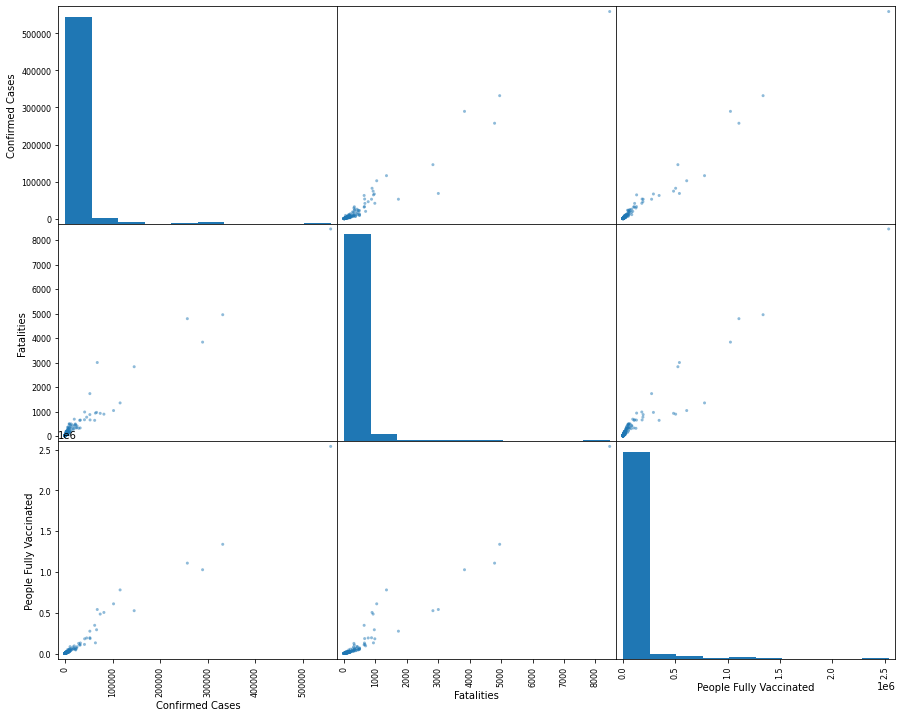

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_df, figsize = (15,12))
plt.show()

In [35]:
new_df.keys()

Index(['Confirmed Cases', 'Fatalities', 'People Fully Vaccinated'], dtype='object')

In [41]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,chisquare
#F, p = f_oneway(ps['A'],ps['B'],ps['C'],ps['D'])
#s,p = f_oneway(udf['Fatalities'],rdf['Fatalities'])
s,p = ttest_ind(new_df['Fatalities'],new_df['People Fully Vaccinated'])
s,p

(-4.1693819046354665, 3.59328030017755e-05)

In [42]:
alpha = 0.05
if p < alpha:
	print('Different distributions (reject H0)')
else:
	print('Same distributions (fail to reject H0, so H0 is accepted)')
s,p 

Different distributions (reject H0)


(-4.1693819046354665, 3.59328030017755e-05)